# 1 Import packages and define useful functions

In [188]:
import pandas as pd
import numpy as np
from scipy import signal
import statsmodels.api as sm

import plotly.express as px
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [287]:
def convert_placeholder_text_to_num(text):
    '''
    Parsing helper script. In a lot of investing.com data e.g.6.1 M is used to indicate 6.1 million. This script converts the string 
    into float for machine learning to be carried out. 
    '''
    result = text
    try:
        if text[-1] == 'M':
            result = float(text[:-2]) * 10**6
        elif text[-1] == 'B':
            result = float(text[:-2]) * 10**9
        elif text[-1] == 'K':
            result = float(text[:-2]) * 10**3
        elif text[-1] == '-':
            result = np.nan
        elif text[-1] == 'nan':
            result = np.nan
        elif text[-1] == 'NA':
            result = np.nan
        elif text[-1] == 'x':
            result = float(text[:-1])
        elif text[-1] == '%':
            result = text.replace(",","")
            result = float(result[:-1])*0.01
    except Exception as e:
        print(e)
       
    return result

In [ ]:
def get_historical_yfinance(ticker):
    '''
    From ticker string in dataframes above, download historical data (5Y), skip if it's not present
    '''
    
    try:
        ticker = f'{ticker:04}'+'.HK' # convert ticker to yfinace form
        asset = yf.Ticker(ticker)
        hist = asset.history(period="3Y")
    except error as e:
        print(e)
        print(str(ticker))
        print('\n')
        
    return hist

# old code to download historical price data (doesn't work)
#historical_price_data = {}

#for elem in test_merge.Ticker:
#    historical_price_data[elem] = get_historical_yfinance(elem)

### Download library of historical stock data for available tickers

In [8]:
test = yf.Ticker("0199.HK")
hist = test.history(period="5Y")

EV['EV'].iloc[0][:-2]
f'{EV.index[0]:04}'+'.HK'

In [29]:
EV['EV'].iloc[0][:-2]

'48.338'

In [19]:
f'{EV.index[0]:04}'+'.HK'

'0199.HK'

In [31]:
float(EV['EV'].iloc[0][:-2])*10**6

48338000.0

# 2 Import datasets

## 2.1 Financial ratios

In [180]:
# import datasets

EV = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/EV.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
fcf = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/fcf.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
ebitda = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/ebitda.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
revenue = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/revenue.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
roe = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/roe.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
gross_profit_margin = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/gross-profit-margin.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
quick_ratio = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/quick-ratio.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')
debt_to_equity = pd.read_csv('data/raw_unprocessed/processed_raw/processed_out/debt-to-equity.csv', index_col=0, parse_dates=True, infer_datetime_format=True, thousands=',')

# remove duplicates
EV = EV.drop_duplicates()
fcf = fcf.drop_duplicates()
ebitda = ebitda.drop_duplicates()
revenue = revenue.drop_duplicates()
roe = roe.drop_duplicates()
gross_profit_margin = gross_profit_margin.drop_duplicates()
quick_ratio = quick_ratio.drop_duplicates()
debt_to_equity = debt_to_equity.drop_duplicates()

# set up for merging dataframes
EV = EV.reset_index()
fcf = fcf.reset_index()
ebitda = ebitda.reset_index()
revenue = revenue.reset_index()
roe = roe.reset_index()
gross_profit_margin = gross_profit_margin.reset_index()
quick_ratio = quick_ratio.reset_index()
debt_to_equity = debt_to_equity.reset_index()

EV = EV.astype(str)
fcf = fcf.astype(str)
ebitda = ebitda.astype(str)
revenue = revenue.astype(str)
roe = roe.astype(str)
gross_profit_margin = gross_profit_margin.astype(str)
quick_ratio = quick_ratio.astype(str)
debt_to_equity = debt_to_equity.astype(str)

In [42]:
# indexing according to ticker

EV.loc[[199]]

,Ticker,Name,Sector,Industry,Industry Group,Market Cap,Last Reported Fiscal Year,EV,EV FQ-1,EV FQ-2,EV FQ-3,EV FQ-4,EV FQ-5,EV FQ-6,EV FQ-7,EV FQ-8,EV FQ-9,EV FQ-10,EV FQ-11,EV FQ-12
199,1908,C&D International Investment Group Limited,Real Estate,Real Estate Management & Development,Real Estate,5.823 B,2022,17.505 B,11.87 B,11.428 B,11.735 B,8.037 B,7.9 B,8.621 B,9.052 B,7.737 B,7.373 B,4.653 B,5.08 B,5.125 B


In [43]:
# indexing by column

EV[["Market Cap","EV"]]

,Market Cap,EV
0,122.1 M,48.338 M
1,383.2 M,365.2 M
2,11.009 B,3.163 B
3,246.4 M,147.6 M
4,205 M,-
...,...,...
256,6.832 B,6.506 B
257,4.703 B,4.748 B
258,251.7 M,1.436 B
259,136.3 M,1.467 B


In [181]:
# merge dataframes into one big one

dataframes = [fcf,ebitda,revenue,roe,gross_profit_margin,quick_ratio,debt_to_equity]
test_merge = EV

for elem in dataframes:
    test_merge = pd.merge(test_merge, elem, how = 'outer',
                      left_on=['Ticker','Name','Sector','Industry','Industry Group','Market Cap','Last Reported Fiscal Year'],
                      right_on=['Ticker','Name','Sector','Industry','Industry Group','Market Cap','Last Reported Fiscal Year'])
    
    
    
#test_merge = pd.merge(EV.reset_index(), fcf.reset_index(), how = 'inner',
                      #left_on=['Ticker','Name','Sector','Industry','Industry Group','Market Cap','Last Reported Fiscal Year'],
                      #right_on=['Ticker','Name','Sector','Industry','Industry Group','Market Cap','Last Reported Fiscal Year'])

In [41]:
# dataset for ML all sectors
# test_merge.dropna().to_csv('test.csv')

## 2.2 Download historical prices

In [245]:
ticker_string = ''

for elem in test_merge.Ticker:
    ticker_string = ticker_string + f'{elem:04}'+'.HK '

ticker_string = ticker_string[:-1] # drop the last white space character

In [234]:
test_assets = yf.download(tickers = ticker_string,  # list of tickers
            period = "5y",         # time period
            interval = "1mo",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)       # download pre/post market hours data?

[*********************100%***********************]  867 of 867 completed

237 Failed downloads:
- 5510.HK: Period '5y' is invalid, must be one of ['1d', '5d']
- 2590.HK: No data found, symbol may be delisted
- 3980.HK: No data found for this date range, symbol may be delisted
- 5200.HK: Period '5y' is invalid, must be one of ['1d', '5d']
- 6940.HK: No data found, symbol may be delisted
- 6070.HK: No data found, symbol may be delisted
- 6720.HK: No data found, symbol may be delisted
- 8750.HK: No data found, symbol may be delisted
- 4970.HK: No data found, symbol may be delisted
- 8680.HK: No data found, symbol may be delisted
- 2240.HK: No data found for this date range, symbol may be delisted
- 7530.HK: No data found, symbol may be delisted
- 3710.HK: No data found for this date range, symbol may be delisted
- 3270.HK: No data found, symbol may be delisted
- 1350.HK: No data found, symbol may be delisted
- 4930.HK: No data found, symbol may be delisted
- 8000.HK: No data found, symbol

In [244]:
asset_prices = test_assets['Adj Close'].dropna(axis=1)

In [286]:
test_merge

,Ticker,Name,Sector,Industry,Industry Group,Market Cap,Last Reported Fiscal Year,EV,EV FQ-1,EV FQ-2,...,Debt / Equity FQ-3,Debt / Equity FQ-4,Debt / Equity FQ-5,Debt / Equity FQ-6,Debt / Equity FQ-7,Debt / Equity FQ-8,Debt / Equity FQ-9,Debt / Equity FQ-10,Debt / Equity FQ-11,Debt / Equity FQ-12
0,199,ITC Properties Group Limited,Real Estate,Real Estate Management & Development,Real Estate,122.1 M,2023,48.338 M,75.623 M,101 M,...,51.5%,89.9%,89.9%,77.3%,77.3%,83.6%,83.6%,83.9%,83.9%,84.7%
1,2322,Hong Kong ChaoShang Group Limited,Industrials,Trading Companies & Distributors,Capital Goods,383.2 M,2023,365.2 M,438.8 M,409.7 M,...,1.5%,0.7%,0.7%,2.1%,2.1%,2.8%,2.8%,3.7%,3.7%,4.4%
2,83,Sino Land Company Limited,Real Estate,Real Estate Management & Development,Real Estate,11.009 B,2023,3.163 B,2.236 B,3.878 B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,321,Texwinca Holdings Limited,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",Consumer Durables & Apparel,246.4 M,2023,147.6 M,178.7 M,173.3 M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335,Upbest Group Limited,Financials,Consumer Finance,Diversified Financials,205 M,2023,-,nan,nan,...,8.6%,9.4%,9.4%,9.9%,9.9%,10.4%,10.4%,10.8%,10.8%,11.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1057,Zhejiang Shibao Company Limited,Consumer Discretionary,Auto Components,Automobiles & Components,658.2 M,2022,NaN,NaN,NaN,...,11.8%,12.5%,8.1%,8.3%,7.8%,8.0%,8.0%,10.2%,12.2%,11.7%
916,1127,Lion Rock Group Limited,Industrials,Commercial Services & Supplies,Commercial & Professional Services,108.9 M,2022,NaN,NaN,NaN,...,27.3%,27.0%,27.0%,25.3%,25.3%,31.0%,31.0%,28.9%,28.9%,34.5%
917,1263,PC Partner Group Limited,Information Technology,"Technology Hardware, Storage & Peripherals",Technology Hardware & Equipment,286.6 M,2022,NaN,NaN,NaN,...,31.5%,26.7%,26.7%,46.6%,46.6%,109.9%,109.9%,163.9%,163.9%,185.7%
918,592,Bossini International Holdings Limited,Consumer Discretionary,Specialty Retail,Retailing,179.4 M,2022,NaN,NaN,NaN,...,40.5%,155.5%,155.5%,123.2%,123.2%,73.2%,73.2%,4.3%,4.3%,2.8%


In [288]:
ML_data = test_merge.dropna().applymap(convert_placeholder_text_to_num).dropna()

could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''
could not convert string to float: ''


In [289]:
ML_data

,Ticker,Name,Sector,Industry,Industry Group,Market Cap,Last Reported Fiscal Year,EV,EV FQ-1,EV FQ-2,...,Debt / Equity FQ-3,Debt / Equity FQ-4,Debt / Equity FQ-5,Debt / Equity FQ-6,Debt / Equity FQ-7,Debt / Equity FQ-8,Debt / Equity FQ-9,Debt / Equity FQ-10,Debt / Equity FQ-11,Debt / Equity FQ-12
0,199,ITC Properties Group Limited,Real Estate,Real Estate Management & Development,Real Estate,1.221000e+08,2023,4.833800e+07,75623000.0,101000000.0,...,0.515,0.899,0.899,0.773,0.773,0.836,0.836,0.839,0.839,0.847
1,2322,Hong Kong ChaoShang Group Limited,Industrials,Trading Companies & Distributors,Capital Goods,3.832000e+08,2023,3.652000e+08,438800000.0,409700000.0,...,0.015,0.007,0.007,0.021,0.021,0.028,0.028,0.037,0.037,0.044
5,179,Johnson Electric Holdings Limited,Consumer Discretionary,Auto Components,Automobiles & Components,1.056000e+09,2023,1.265000e+09,1435000000.0,1384000000.0,...,0.256,0.28,0.28,0.213,0.213,0.247,0.247,0.26,0.26,0.224
9,989,Hua Yin International Holdings Limited,Real Estate,Real Estate Management & Development,Real Estate,3.854000e+08,2023,5.113000e+08,592700000.0,537900000.0,...,-4.184,-4.0,-4.0,-3.746,-3.746,-1.337,-1.337,-1.472,-1.472,1.822
10,105,Associated International Hotels Limited,Real Estate,Real Estate Management & Development,Real Estate,4.297000e+08,2023,3.898000e+08,496900000.0,536100000.0,...,0.021,0.02,0.02,0.019,0.019,0.017,0.017,0.016,0.016,0.015
12,25,Chevalier International Holdings Limited,Industrials,Industrial Conglomerates,Capital Goods,2.712000e+08,2023,1.794000e+08,234600000.0,169600000.0,...,0.413,0.414,0.414,0.381,0.381,0.38,0.38,0.397,0.397,0.407
13,1023,Sitoy Group Holdings Limited,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",Consumer Durables & Apparel,1.076000e+08,2023,7.340200e+07,34269000.0,28945000.0,...,0.062,0.081,0.081,0.121,0.121,0.128,0.128,0.186,0.186,0.149
18,1468,Kingkey Financial International (Holdings) Lim...,Financials,Capital Markets,Diversified Financials,1.554000e+09,2023,1.582000e+09,500100000.0,502800000.0,...,0.336,0.325,0.325,0.637,0.637,0.494,0.494,0.404,0.404,0.263
20,1243,Wang On Properties Limited,Real Estate,Real Estate Management & Development,Real Estate,1.104000e+08,2023,1.594000e+08,242000000.0,327800000.0,...,0.886,1.015,1.015,0.98,0.98,0.941,0.941,0.767,0.767,0.807
25,1373,International Housewares Retail Company Limited,Consumer Discretionary,Specialty Retail,Retailing,2.586000e+08,2023,2.516000e+08,273000000.0,244100000.0,...,0.604,0.595,0.595,0.624,0.624,0.583,0.583,0.685,0.685,0.768


In [290]:
ratio_ticker_list = list(ML_data.Ticker)
ratio_ticker_list_new = []

for elem in ratio_ticker_list:
    ratio_ticker_list_new.append(elem+'.HK')

In [291]:
asset_ticker_list = list(asset_prices.columns)

combined_tickers = [value for value in asset_ticker_list if value in ratio_ticker_list_new]

In [292]:
combined_tickers
combined_ticker_int = []

for elem in combined_tickers:
    combined_ticker_int.append(elem[:-3])

In [296]:
ML_data[ML_data['Ticker'].isin(combined_ticker_int)]

,Ticker,Name,Sector,Industry,Industry Group,Market Cap,Last Reported Fiscal Year,EV,EV FQ-1,EV FQ-2,...,Debt / Equity FQ-3,Debt / Equity FQ-4,Debt / Equity FQ-5,Debt / Equity FQ-6,Debt / Equity FQ-7,Debt / Equity FQ-8,Debt / Equity FQ-9,Debt / Equity FQ-10,Debt / Equity FQ-11,Debt / Equity FQ-12
1,2322,Hong Kong ChaoShang Group Limited,Industrials,Trading Companies & Distributors,Capital Goods,3.832000e+08,2023,3.652000e+08,438800000.0,409700000.0,...,0.015,0.007,0.007,0.021,0.021,0.028,0.028,0.037,0.037,0.044
13,1023,Sitoy Group Holdings Limited,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",Consumer Durables & Apparel,1.076000e+08,2023,7.340200e+07,34269000.0,28945000.0,...,0.062,0.081,0.081,0.121,0.121,0.128,0.128,0.186,0.186,0.149
18,1468,Kingkey Financial International (Holdings) Lim...,Financials,Capital Markets,Diversified Financials,1.554000e+09,2023,1.582000e+09,500100000.0,502800000.0,...,0.336,0.325,0.325,0.637,0.637,0.494,0.494,0.404,0.404,0.263
20,1243,Wang On Properties Limited,Real Estate,Real Estate Management & Development,Real Estate,1.104000e+08,2023,1.594000e+08,242000000.0,327800000.0,...,0.886,1.015,1.015,0.98,0.98,0.941,0.941,0.767,0.767,0.807
25,1373,International Housewares Retail Company Limited,Consumer Discretionary,Specialty Retail,Retailing,2.586000e+08,2023,2.516000e+08,273000000.0,244100000.0,...,0.604,0.595,0.595,0.624,0.624,0.583,0.583,0.685,0.685,0.768
57,1140,Wealthking Investments Limited,Financials,Capital Markets,Diversified Financials,4.959000e+08,2023,2.332700e+07,397300000.0,5587000.0,...,0.339,0.09,0.09,0.128,0.128,0.075,0.075,0.143,0.143,0.081
96,1499,OKG Technology Holdings Limited,Industrials,Construction & Engineering,Capital Goods,2.429000e+08,2023,3.072000e+08,174400000.0,142600000.0,...,3.682,0.547,0.547,0.687,0.687,0.587,0.587,0.59,0.59,0.621


In [277]:
test_merge['Ticker']

0       199
1      2322
2        83
3       321
4       335
       ... 
915    1057
916    1127
917    1263
918     592
919    2066
Name: Ticker, Length: 920, dtype: object

In [278]:
asset_prices[combined_tickers]

,1003.HK,1023.HK,1029.HK,1030.HK,1033.HK,1038.HK,1044.HK,1045.HK,1050.HK,1051.HK,...,8053.HK,8095.HK,8137.HK,8227.HK,8279.HK,8299.HK,8328.HK,8365.HK,8395.HK,8446.HK
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-01,1.90,1.247939,0.170,5.471571,1.18,53.217861,60.656685,2.769410,0.890331,4.379912,...,0.452760,1.36,1.580,6.020,0.930,0.224998,2.005379,0.471491,0.105524,3.12
2018-04-01,2.00,1.323926,0.168,5.405748,1.16,51.517204,58.403969,2.853796,0.909179,3.899922,...,0.461637,1.35,1.410,5.280,0.860,0.209998,2.130000,0.565790,0.090731,1.98
2018-05-01,1.97,1.308351,0.148,5.060175,1.27,49.111416,62.325375,2.700366,0.924721,3.959920,...,0.461637,1.22,1.510,4.490,0.920,0.209998,2.190000,0.556360,0.093690,0.59
2018-06-01,2.00,1.308351,0.134,6.030394,1.05,49.587364,64.259438,2.470221,0.909179,5.339893,...,0.479392,1.03,1.330,4.240,0.800,0.194999,1.930000,0.518640,0.079883,0.65
2018-07-01,2.09,1.760043,0.137,5.987926,1.07,49.672642,59.450615,2.362296,0.878096,5.579888,...,0.443882,0.92,1.170,3.690,0.730,0.149999,2.000000,0.546930,0.063117,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,0.90,0.560000,0.119,3.500000,0.54,39.299999,35.950001,2.020000,1.290000,2.170000,...,0.500000,0.49,0.310,0.470,0.248,0.247000,5.030000,0.495000,0.950000,7.52
2022-12-01,1.10,0.580000,0.133,2.890000,0.51,40.849998,41.450001,2.110000,1.480000,2.170000,...,0.395000,0.56,0.345,0.490,0.248,0.164000,5.170000,0.880000,0.830000,8.80
2023-01-01,1.21,0.900000,0.130,3.060000,0.61,43.549999,38.500000,2.250000,1.440000,2.410000,...,0.410000,0.60,0.910,0.410,0.280,0.166000,5.100000,0.800000,0.730000,7.94


In [255]:
asset_prices.columns

Index(['1000.HK', '1003.HK', '1010.HK', '1020.HK', '1023.HK', '1029.HK',
       '1030.HK', '1033.HK', '1038.HK', '1044.HK',
       ...
       '8300.HK', '8328.HK', '8360.HK', '8365.HK', '8370.HK', '8395.HK',
       '8446.HK', '8460.HK', '8480.HK', '9900.HK'],
      dtype='object', length=415)

# 3 PCA / LDA analysis

## 3.1 LDA

In [211]:
PCA_LDA_df = test_merge[['Ticker', 'Sector', 'Industry', 'Market Cap', 'EV',\
           'FCF', 'EBITDA', 'Revenue', 'ROE', 'Gross-Profit-Margin',\
            'Quick-Ratio', 'Debt / Equity']]

# remove NaNs, replace placeholder text with floats

PCA_LDA_df = PCA_LDA_df.dropna().applymap(convert_placeholder_text_to_num).dropna()

# set up datasets for LDA 

#X = dataset.iloc[:, 0:4].values
#y = dataset.iloc[:, 4].values

X = PCA_LDA_df[['Market Cap', 'EV', 'FCF', 'EBITDA', 'Revenue', 'ROE', 'Gross-Profit-Margin',\
            'Quick-Ratio', 'Debt / Equity']].values
y = PCA_LDA_df[['Sector']].values
y = y.flatten()

# scaler = StandardScaler()
# X_lda = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

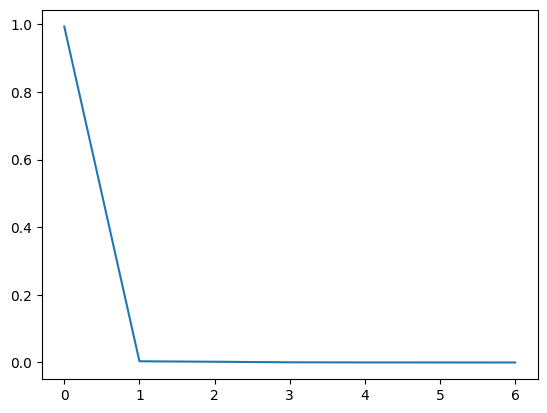

In [212]:
plt.plot(lda.explained_variance_ratio_)

In [ ]:
# from https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

In [169]:
X;

## 3.2 PCA

In [183]:
# taken from https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)#, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [184]:
scaler = StandardScaler()
scaler.fit(X)
X_pca=scaler.transform(X)    
pca = PCA()
X_pca = pca.fit_transform(X_pca)

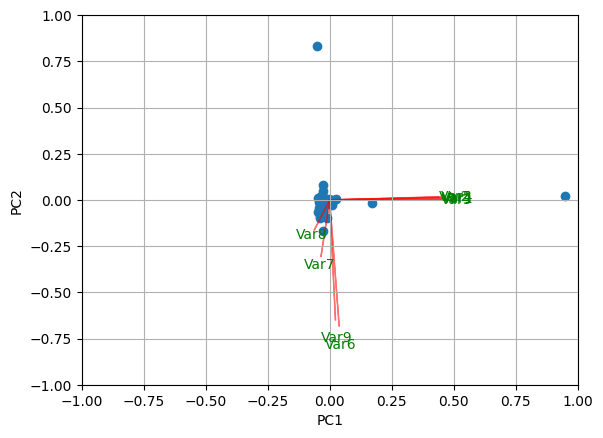

In [187]:
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

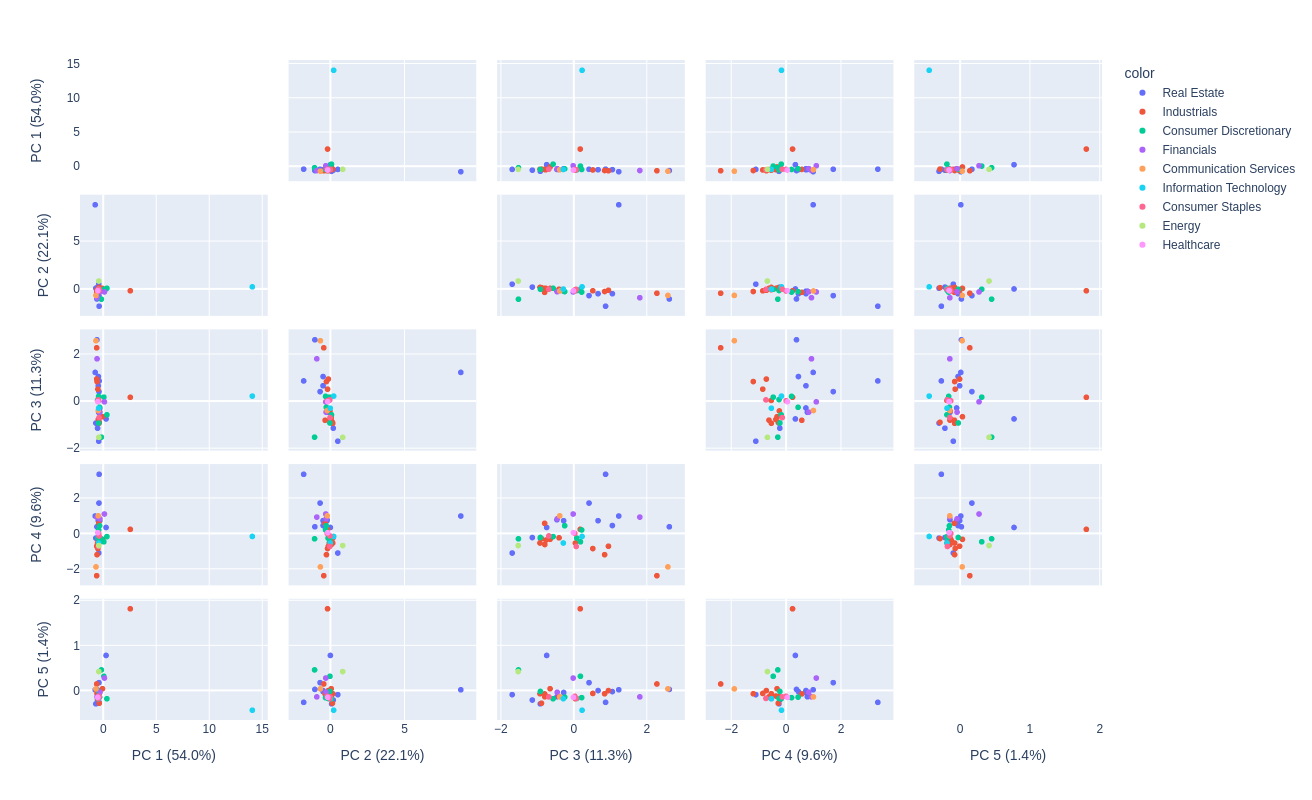

In [174]:
# Using plotly

components = pca.fit_transform(X_pca)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=y.flatten()
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.show()

In [189]:
# Percentage of variance explained for each components
print("explained variance ratio: %s" % str(pca.explained_variance_ratio_))

explained variance ratio: [5.39614297e-01 2.21427804e-01 1.13341854e-01 9.61741960e-02
 1.36704757e-02 1.10874438e-02 3.20397805e-03 1.29777607e-03
 1.82176038e-04]


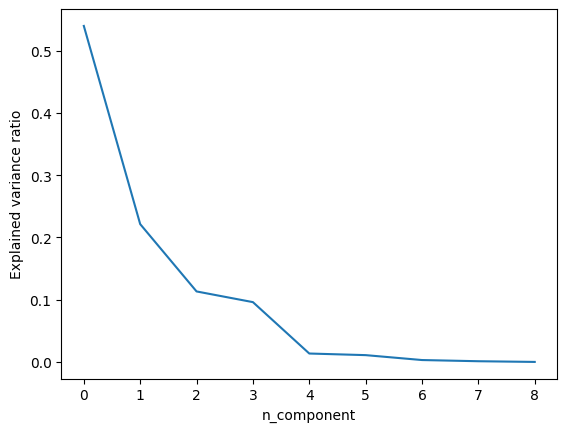

In [190]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('n_component');
plt.ylabel('Explained variance ratio');

In [50]:
list(test_merge.columns)

['Ticker',
 'Name',
 'Sector',
 'Industry',
 'Industry Group',
 'Market Cap',
 'Last Reported Fiscal Year',
 'EV',
 'EV FQ-1',
 'EV FQ-2',
 'EV FQ-3',
 'EV FQ-4',
 'EV FQ-5',
 'EV FQ-6',
 'EV FQ-7',
 'EV FQ-8',
 'EV FQ-9',
 'EV FQ-10',
 'EV FQ-11',
 'EV FQ-12',
 'FCF',
 'FCF FQ-1',
 'FCF FQ-2',
 'FCF FQ-3',
 'FCF FQ-4',
 'FCF FQ-5',
 'FCF FQ-6',
 'FCF FQ-7',
 'FCF FQ-8',
 'FCF FQ-9',
 'FCF FQ-10',
 'FCF FQ-11',
 'FCF FQ-12',
 'EBITDA',
 'EBITDA FQ-1',
 'EBITDA FQ-2',
 'EBITDA FQ-3',
 'EBITDA FQ-4',
 'EBITDA FQ-5',
 'EBITDA FQ-6',
 'EBITDA FQ-7',
 'EBITDA FQ-8',
 'EBITDA FQ-9',
 'EBITDA FQ-10',
 'EBITDA FQ-11',
 'EBITDA FQ-12',
 'Revenue',
 'Revenue FQ-1',
 'Revenue FQ-2',
 'Revenue FQ-3',
 'Revenue FQ-4',
 'Revenue FQ-5',
 'Revenue FQ-6',
 'Revenue FQ-7',
 'Revenue FQ-8',
 'Revenue FQ-9',
 'Revenue FQ-10',
 'Revenue FQ-11',
 'Revenue FQ-12',
 'ROE',
 'ROE FQ-1',
 'ROE FQ-2',
 'ROE FQ-3',
 'ROE FQ-4',
 'ROE FQ-5',
 'ROE FQ-6',
 'ROE FQ-7',
 'ROE FQ-8',
 'ROE FQ-9',
 'ROE FQ-10',
 'ROE F

In [88]:
test_merge.columns

Index(['Ticker', 'Name', 'Sector', 'Industry', 'Industry Group', 'Market Cap',
       'Last Reported Fiscal Year', 'EV', 'EV FQ-1', 'EV FQ-2', 'EV FQ-3',
       'EV FQ-4', 'EV FQ-5', 'EV FQ-6', 'EV FQ-7', 'EV FQ-8', 'EV FQ-9',
       'EV FQ-10', 'EV FQ-11', 'EV FQ-12', 'FCF', 'FCF FQ-1', 'FCF FQ-2',
       'FCF FQ-3', 'FCF FQ-4', 'FCF FQ-5', 'FCF FQ-6', 'FCF FQ-7', 'FCF FQ-8',
       'FCF FQ-9', 'FCF FQ-10', 'FCF FQ-11', 'FCF FQ-12'],
      dtype='object')

In [ ]:
merged = pd.merge(data1, data2, how='inner',
                  left_on=['Salary', 'Debt'],
                  right_on=['Salary', 'Debt'])

In [75]:
EV.index

Int64Index([ 199, 2322,   83,  321,  335,  179,  241,  247,  855,  989,
            ...
             354,  257, 3639, 1823,  580,  285,  853, 2198, 6136,  127],
           dtype='int64', name='Ticker', length=261)

Int64Index([1726, 8021, 2221, 1499, 1982, 6819, 1797, 6858, 8395, 1283,
            ...
            2175, 1638, 6922, 9658, 7855, 2297, 7827, 1244, 2421, 9636],
           dtype='int64', name='Ticker', length=733)

In [41]:
current_fratios_dict = {"EV": EV,
                        "fcf": fcf,
                        "ebitda": ebitda,
                        "revenue": revenue,
                        "roe": roe,
                        "gross_profit_margin": gross_profit_margin,
                        "quick_ratio": quick_ratio,
                        "debt_to_equity": debt_to_equity}

current_quarter_fratios = pd.DataFrame()

current_quarter_fratios = pd.concat([current_quarter_fratios,current_fratios_dict["EV"][["Market Cap","EV"]]],axis=1)
current_quarter_fratios = pd.concat([current_quarter_fratios,current_fratios_dict["fcf"][["FCF"]]],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [39]:
current_quarter_fratios

,Market Cap,EV
Ticker,,
199,122.1 M,48.338 M
2322,383.2 M,365.2 M
83,11.009 B,3.163 B
321,246.4 M,147.6 M
335,205 M,-
...,...,...
1989,103.5 M,204.7 M
1499,242.9 M,307.2 M
1341,231.2 M,149.7 M


In [40]:
fcf

,Name,Sector,Industry,Industry Group,Market Cap,Last Reported Fiscal Year,FCF,FCF FQ-1,FCF FQ-2,FCF FQ-3,FCF FQ-4,FCF FQ-5,FCF FQ-6,FCF FQ-7,FCF FQ-8,FCF FQ-9,FCF FQ-10,FCF FQ-11,FCF FQ-12
Ticker,,,,,,,,,,,,,,,,,,,
1726,HKE Holdings Limited,Industrials,Construction & Engineering,Capital Goods,179.2 M,2023,-12.484 M,-2.642 M,-3.287 M,-3.37 M,-507.667 K,-504.209 K,35.16 K,35.15 K,-305.878 K,-295.945 K,215.249 K,211.049 K,623.25 K
8021,WLS Holdings Limited,Industrials,Construction & Engineering,Capital Goods,128.1 M,2023,-2.354 M,NaN,NaN,0 K,0 K,0 K,0 K,0 K,0 K,0 K,0 K,0 K,0 K
2221,New Concepts Holdings Limited,Industrials,Construction & Engineering,Capital Goods,120.7 M,2023,10.267 M,-3.196 M,8.346 M,8.385 M,-1.908 M,-1.913 M,0 K,0 K,2.895 M,2.895 M,4.363 M,4.234 M,5.133 M
1499,OKG Technology Holdings Limited,Industrials,Construction & Engineering,Capital Goods,242.9 M,2023,-20.69 M,-7.893 M,-2.459 M,-2.471 M,-1.558 M,-1.562 M,-50.747 K,-50.887 K,-384.837 K,-384.813 K,-3.535 M,-3.517 M,-805.913 K
1982,Nameson Holdings Limited,Consumer Discretionary,"Textiles, Apparel & Luxury Goods",Consumer Durables & Apparel,153.9 M,2023,61.472 M,8.846 M,21.939 M,22.042 M,-16.057 M,-16.099 M,28.831 M,28.91 M,7.911 M,7.911 M,26.037 M,25.904 M,10.503 M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,Rainmed Medical Limited,Healthcare,Healthcare Equipment & Supplies,Healthcare Equipment & Services,169.6 M,-,-,NaN,-4.221 M,-4.46 M,0 K,0 K,-3.543 M,-3.492 M,0 K,0 K,0 K,0 K,0 K
7827,Vision Deal HK Acquisition Corp.,Financials,Capital Markets,Diversified Financials,157.8 M,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1244,3D Medicines Inc.,Healthcare,Biotechnology,"Pharmaceuticals, Biotechnology & Life Sciences",2.251 B,-,-53.93 M,NaN,NaN,NaN,0 K,0 K,0 K,0 K,0 K,0 K,0 K,0 K,0 K


# obsolete code

In [ ]:
# create a list / index of all tickers combined from all csv's

list_of_tickers = [EV.index,fcf.index,ebitda.index,revenue.index,roe.index,gross_profit_margin.index,quick_ratio.index,debt_to_equity.index]
combined_tickers = []

for elem in list_of_tickers:
    combined_tickers = list(set(combined_tickers + list(elem)))

In [ ]:
# create a list / index of all columns from all csv's

list_of_columns = [EV.columns,fcf.columns,ebitda.columns,revenue.columns,roe.columns,gross_profit_margin.columns,quick_ratio.columns,debt_to_equity.columns]
combined_cols = []

for elem in list_of_columns:
    combined_cols = list(set(combined_cols + list(elem)))